# Consumer Complaint Classification

The dataset represents consumer complaints about the number of products. Student loan and Bank account or service are products. The RNN has to classify consumer complaints are text data.

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import accuracy_score
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Activation,LSTM
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Embedding,SpatialDropout1D
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df_consumer_complaints = pd.read_csv("Consumer_Complaints (1).csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_consumer_complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303617 entries, 0 to 1303616
Data columns (total 18 columns):
Date received                   1303617 non-null object
Product                         1303617 non-null object
Sub-product                     1068451 non-null object
Issue                           1303617 non-null object
Sub-issue                       769820 non-null object
Consumer complaint narrative    384865 non-null object
Company public response         460903 non-null object
Company                         1303617 non-null object
State                           1283431 non-null object
ZIP code                        1185291 non-null object
Tags                            178463 non-null object
Consumer consent provided?      700309 non-null object
Submitted via                   1303617 non-null object
Date sent to company            1303617 non-null object
Company response to consumer    1303610 non-null object
Timely response?                1303617 non-null obj

In [ ]:
df_consumer_complaints.head()

Date received  ... Complaint ID
0    06/07/2019  ...      3267335
1    06/07/2019  ...      3267169
2    06/07/2019  ...      3266966
3    06/07/2019  ...      3267618
4    06/07/2019  ...      3267687

[5 rows x 18 columns]

In [ ]:
df_consumer_complaints.Product.value_counts()

Mortgage                                                                        279773
Debt collection                                                                 248580
Credit reporting, credit repair services, or other personal consumer reports    236660
Credit reporting                                                                140432
Credit card                                                                      89190
Bank account or service                                                          86206
Student loan                                                                     52166
Credit card or prepaid card                                                      49515
Checking or savings account                                                      42364
Consumer Loan                                                                    31605
Vehicle loan or lease                                                            11796
Money transfer, virtual currency, or money 

## Filtering observations and columns we wanted to train the model

In [ ]:
# Merging some of observations which are same categories
df_consumer_complaints.loc[df_consumer_complaints['Product'] == 'Credit reporting', 'Product'] = 'Credit reporting, credit repair services, or other personal consumer reports'
df_consumer_complaints.loc[df_consumer_complaintsdf['Product'] == 'Credit card', 'Product'] = 'Credit card or prepaid card'
df_consumer_complaints.loc[df_consumer_complaints['Product'] == 'Payday loan', 'Product'] = 'Payday loan, title loan, or personal loan'
df_consumer_complaints.loc[df_consumer_complaints['Product'] == 'Virtual currency', 'Product'] = 'Money transfer, virtual currency, or money service'
df_consumer_complaints = df_consumer_complaints[df_consumer_complaints.Product != 'Other financial service']

In [ ]:
# Filtering two columns one column is for input and another one is for output
df_consumer = df_consumer_complaints.loc[:,["Consumer complaint narrative","Product"]]


In [ ]:
# Drop observations which is NAN
df_consumer  = df_consumer.dropna()

In [ ]:
#Taking observations only three categories
df_Credit = df_consumer.loc[df_consumer['Product'] == "Credit card or prepaid card", :]
df_bank = df_consumer.loc[df_consumer['Product'] == "Bank account or service", :]
df_student = df_consumer.loc[df_consumer['Product'] == "Student loan", :]

# Merging observations of three categories
df_consumer =pd.concat([df_Credit,df_bank,df_student])

## Clearning the data set

In [ ]:
# Reset the index of dataframe
df_consumer = df_consumer.reset_index(drop=True)
# Create a pattern to filter
repalce_space = re.compile('[/(){}\[\]\|@,;]')
#remove_bad_symbols = re.compile('[^a-zA-Z ]')
remove_bad_symbols = re.compile('[^0-9a-z #+_]')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    #lowercase text
    text = text.lower() 
    # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = repalce_space.sub(' ', text)
    # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
    text = remove_bad_symbols.sub('', text)  
    text = text.replace('x', '')
    #text = re.sub(r'\W+', '', text)
    # remove stopwors from text
    text = ' '.join(word for word in text.split() if word not in stop_words) 
    return text


In [ ]:
# Clean the data set
df_consumer['Consumer complaint narrative'] = df_consumer['Consumer complaint narrative'].apply(clean_text)
df_consumer['Consumer complaint narrative'] = df_consumer['Consumer complaint narrative'].str.replace('\d+', '')

## The Following code  creates word clouds from the dataset and visualize

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
stop_word = set(STOPWORDS)


def generate_wordcloud(text,title = None): 
    
    #Creating wordcloud object and getting list of frequent words from text
    wordcloud = WordCloud(background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          scale=3,
                          stopwords = stop_word,).generate(text)
    
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
   
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.show()



## Visualizing most frequent words in the "Credit card or prepaid card" category

In [ ]:
df_Credit["Consumer complaint narrative"] = df_Credit["Consumer complaint narrative"].apply(clean_text)
df_Credit["Consumer complaint narrative"] = df_Credit["Consumer complaint narrative"].str.replace('\d+', '')


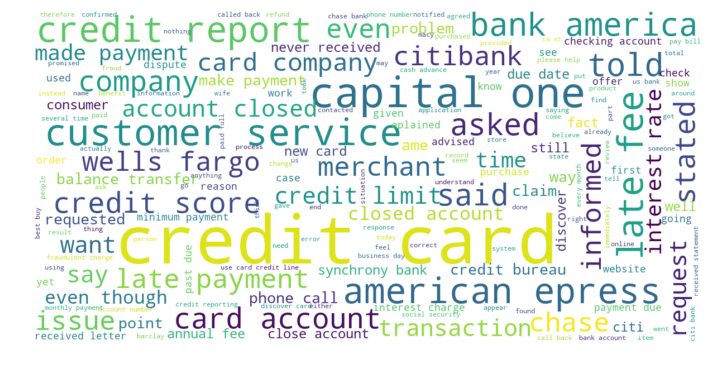

In [ ]:
generate_wordcloud(' '.join(df_bank.iloc[:,0]))

We can notice that frequency words in "Credit card or prepaid card" category.

## Visualizing most frequent words in the "Bank account or service" category



In [ ]:
df_bank["Consumer complaint narrative"] = df_bank["Consumer complaint narrative"].apply(clean_text)
df_bank["Consumer complaint narrative"] = df_bank["Consumer complaint narrative"].str.replace('\d+', '')

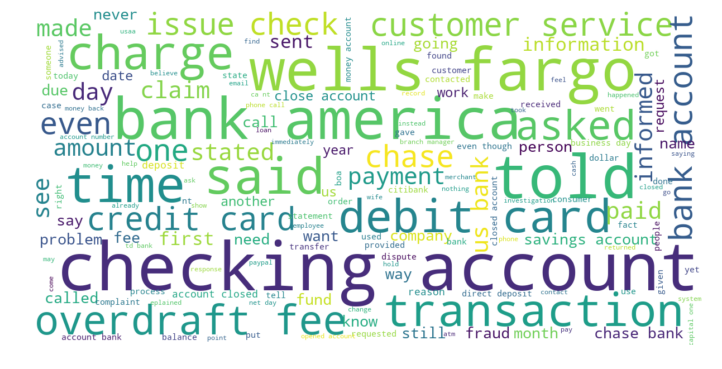

In [ ]:
generate_wordcloud(' '.join(df_bank.iloc[:,0]))

We can notice that frequency words in "Bank account or service" category.

## Visualizing most frequent words in the "Student loan" category

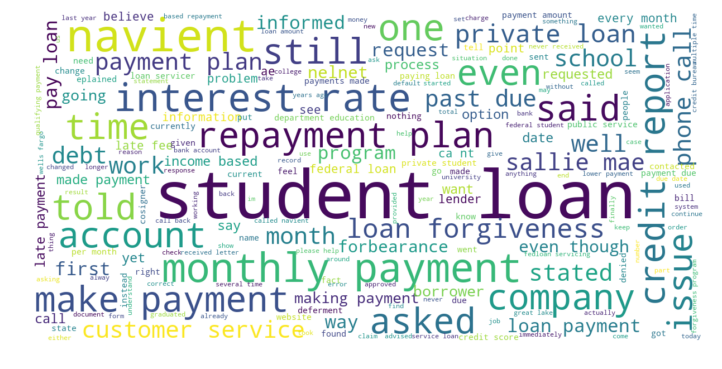

In [ ]:
df_student["Consumer complaint narrative"] = df_student["Consumer complaint narrative"].apply(clean_text)
df_student["Consumer complaint narrative"] = df_student["Consumer complaint narrative"].str.replace('\d+', '')
generate_wordcloud(' '.join(df_student.iloc[:,0]))

We can notice that frequency words in "Student loan" category.

## Tokenizing the words

In [ ]:
# The maximum number of words to be used. (most frequent)
max_no_words = 25000
# Max number of words in each complaint.
max_seq_len = 250
# Create tokenizer object
tokenizer = Tokenizer(num_words=max_no_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
# Fit the tokenizer on text data
tokenizer.fit_on_texts(df_consumer['Consumer complaint narrative'].values)
# Count how many unique tokes are in these observations
word_index = tokenizer.word_index
print('Number of unique tokens %s' % len(word_index))

Number of unique tokens 60837


In [ ]:
# Text to sequences 
X = tokenizer.texts_to_sequences(df_consumer['Consumer complaint narrative'].values)

# Padding the sequences
X = pad_sequences(X, maxlen=max_seq_len)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (77112, 250)


In [ ]:
# Create dummies variables for output variable
Y = pd.get_dummies(df_consumer['Product']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (77112, 3)


## Spilit the dataset into train and test dataset

In [ ]:
#Traning and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(53978, 250) (53978, 3)
(23134, 250) (23134, 3)


## Model development with simple RNN

## Training the model

In [ ]:
#Create sequential object
model = Sequential()
#Embedding layer
model.add(Embedding(max_no_words, 100, input_length=X.shape[1]))
#Dropout layer
model.add(SpatialDropout1D(0.2))
#RNN layer
model.add(SimpleRNN(100, input_shape = (53978,250), return_sequences = False))
#Fully connected layer
model.add(Dense(3))
model.add(Activation('softmax'))




#Optimizer 
adam = optimizers.Adam(lr = 0.001)
#Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
#Fit the model on the training dataset
history = model.fit(X_train, Y_train,epochs = 30, batch_size = 50, validation_split=0.1,
                    
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 48580 samples, validate on 5398 samples
Epoch 1/30
48580/48580 [==============================] - 142s 3ms/step - loss: 0.8141 - acc: 0.6450 - val_loss: 0.8714 - val_acc: 0.6288
Epoch 2/30
48580/48580 [==============================] - 137s 3ms/step - loss: 0.6454 - acc: 0.7397 - val_loss: 0.6055 - val_acc: 0.7742
Epoch 3/30
48580/48580 [==============================] - 136s 3ms/step - loss: 0.6995 - acc: 0.7109 - val_loss: 1.0376 - val_acc: 0.6286
Epoch 4/30
48580/48580 [==============================] - 137s 3ms/step - loss: 0.6685 - acc: 0.7215 - val_loss: 0.6954 - val_acc: 0.6932
Epoch 5/30
48580/48580 [==============================] - 139s 3ms/step - loss: 0.6864 - acc: 0.7031 - val_loss: 0.7968 - val_acc: 0.6489


## Save the model

In [ ]:
# Save the model
model.save('/content/drive/My Drive/Project/RNN/model_rnn.h5')

## Testing the model

In [ ]:
accuracy = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accuracy [0],accuracy [1]))

23134/23134 [==============================] - 55s 2ms/step
Test set
  Loss: 0.795
  Accuracy: 0.643


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(X_test)
y_test = np.argmax(Y_test, axis = 1)
#print(accuracy_score(y_pred, y_test))

confusion_matrix(y_test, y_pred)

array([[  671,  3391,   363],
       [  484, 10338,  1336],
       [   85,  2601,  3865]])

There are 4425 observations belongs to "bank account or service". In which, only  671 observations are correctly predicted.

There are 12158 observations belongs to "Credit card or prepaid card". In which, only 10338 observations are correctly predicted.

There are 6551 observations belongs to "Student loan". In which, only 3865 observations are correctly predicted.


In [ ]:
from sklearn.metrics import classification_report
labels = ['Bank account or service','Credit card or prepaid card','Student loan', ]
print(classification_report(y_test, y_pred, target_names=labels))

                             precision    recall  f1-score   support

    Bank account or service       0.54      0.15      0.24      4425
Credit card or prepaid card       0.63      0.85      0.73     12158
               Student loan       0.69      0.59      0.64      6551

                   accuracy                           0.64     23134
                  macro avg       0.62      0.53      0.53     23134
               weighted avg       0.63      0.64      0.61     23134



The RNN model predicts "Credit card or prepaid card " and "Student loan" observations correctly above 60 % of the f1 score. But the model did not perform poorly on "Banks account or service" category.

## Predictions

In [ ]:
# Single observation
x = np.reshape(X_test[0], (1,-1))
#Prediction on single observation
pred_observation = model.predict_classes(x)
labels = ['Bank account or service','Credit card or prepaid card','Student loan', ]
print(pred_observation[0], labels [pred_observation[0]])

1 Credit card or prepaid card


## Visualizing "Loss" and "Accuracy" on each epoch

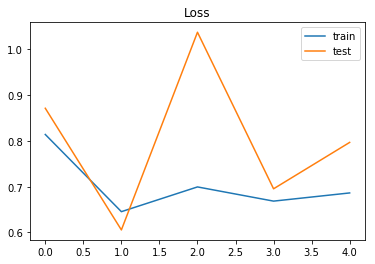

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

The plot shows the training and the testing loss on each epoch.

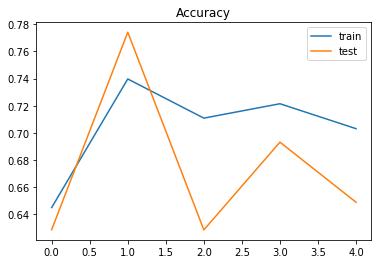

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

The plot shows the training and the testing accuracy on each epoch.

The RNN model classifies the customer complains at 64 % accuracy on the test dataset.